In [61]:
import pandas as pd
import numpy as np
import os

# Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


import warnings # Ignore useless warnings (see SciPy issue #5998)
warnings.filterwarnings(action="ignore", message="^internal gelsd")


Benchmark LogReg auf vollem gelabelten Datensatz (1374 Labels)

In [97]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
print(X_train.shape, y_train.shape)
log_reg = LogisticRegression(max_iter=1000, multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train).score(X_test, y_test)


(1347, 64) (1347,)


0.96

### Semi Super-Supervised Learning

LogReg auf Trainingsset mit 50 Trainingsdaten

In [98]:
n_labeled = 50

log_reg = LogisticRegression(max_iter=1000, multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8355555555555556

(1) k-Means mit k = 50 trainieren und den jeweils repräsentativsten (d.h. nähesten) Trainingspunkt <br>
zu den 50 Centroids identifizieren

In [99]:
from sklearn.cluster import KMeans
k = 50
kmeans = KMeans(n_clusters = k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
X_representative_digits.shape

(50, 64)

(2) Manuelles Labeln der 50 representativen Trainingspunkte und <br>LogReg erneut ausführen auf den 50 Trainingspunkten

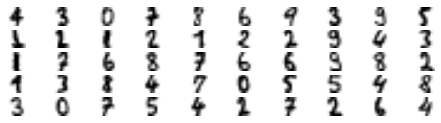

In [100]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [101]:
y_representative_digits = np.array([
    4,3,0,7,8,6,9,3,9,5,
    1,2,1,2,1,2,2,9,4,3,
    1,7,6,8,7,6,6,9,8,2,
    1,3,8,4,7,0,5,5,4,8,
    3,0,7,5,4,2,7,2,6,4,   
])

LogReg auf Trainingsset mit 50 Trainingsdaten

In [102]:
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, solver="lbfgs", random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9088888888888889

Representatives Label auf ALLE (!) restlichen ungelabelten Punkte propagieren

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[3 3 3 3 3 3 3 3 3

(array([0.11218345, 0.11300833, 0.10723418, 0.1105337 , 0.1179576 ,
        0.11218345, 0.11218345, 0.11713272, 0.12125711, 0.0874371 ]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

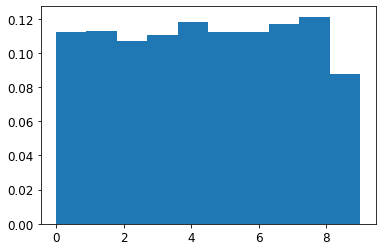

In [103]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)  # arbitrary filler data
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    print(y_train_propagated[kmeans.labels_==i])
plt.hist(y_train_propagated, density=True)   

In [104]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9155555555555556

Representatives Label auf die 20% zentralsten (zum Centroid) Trainingspunkte propagieren:

<i>We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid, because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 20th percentile closest to the centroid</i>

In [111]:
X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

(1347,)

In [126]:
kmeans.labels_.shape

(1347,)

In [135]:
kmeans.labels_

array([ 0, 49, 13, ..., 29, 14, 21])

In [127]:
np.arange(len(X_train))

array([   0,    1,    2, ..., 1344, 1345, 1346])

In [125]:
X_digits_dist.shape

(1347, 50)

In [133]:
X_digits_dist.shape

(1347, 50)

In [132]:
x2 = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
x2[:10]

array([23.34884157, 21.36728256, 26.47845999, 17.54727983, 23.11227962,
       24.80567331, 22.75640935, 19.09271601, 20.14430282, 12.20173067])

In [120]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [121]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [123]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9111111111111111